In [3]:
import pandas as pd # read dataset
import numpy as np # numerical python
import matplotlib.pyplot as plt #to plot graph
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns #plot graph in graphical manner

In [4]:
#read dataset
df=pd.read_csv('diabetes.csv')

In [5]:
df.head(6) # Read Data in First Five

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [6]:
#To Predict Weather diabetic or Not

In [7]:
df.shape # How Many Rows and Columns

(768, 9)

In [8]:
df.info() # if Dtype is Object then u can convert it into Numerical Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull() # to check null values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum() #To chk null values in all column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#df.dropna() #if it has any null remove this using dropna command

<Axes: xlabel='Outcome', ylabel='count'>

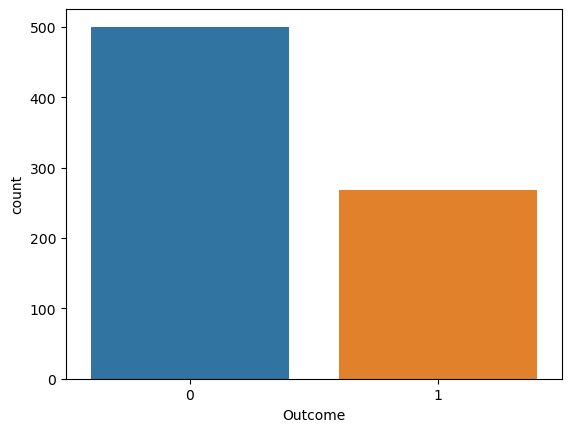

In [12]:
#Data Visualization
sns.countplot(x = 'Outcome',data = df)

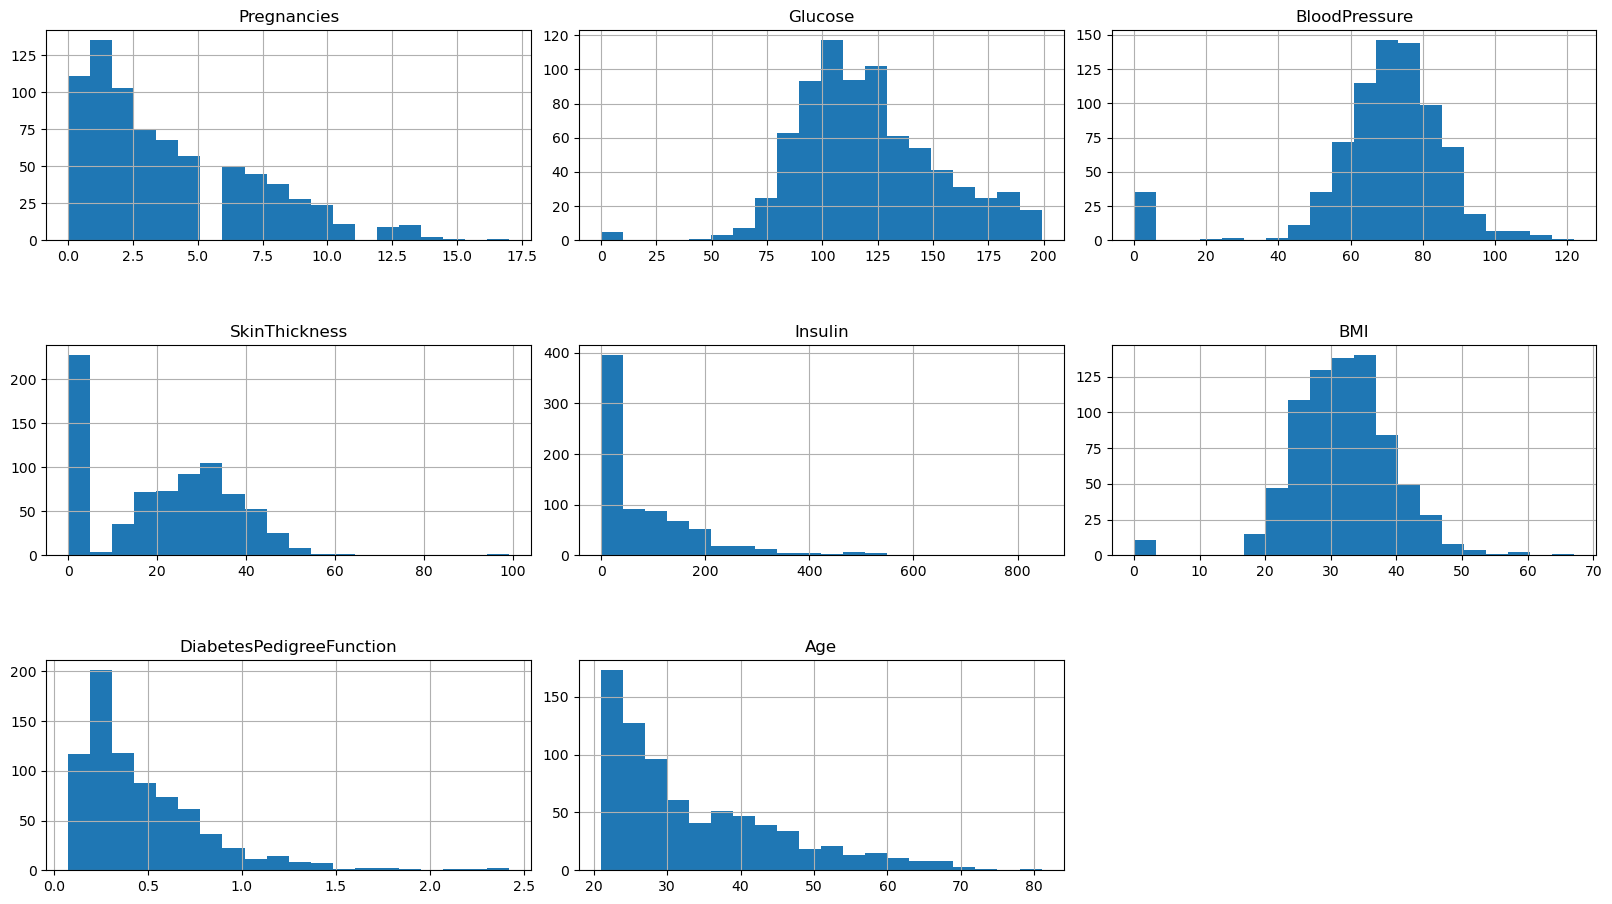

In [13]:
# Histogram of each feature
import itertools

col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(4, 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

Train and Test


In [14]:
from sklearn.model_selection import train_test_split #data #label

In [15]:
x=df.iloc[:,df.columns!='Outcome'] #data
y=df.iloc[:,df.columns=='Outcome'] #label

In [16]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(y)

     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]


In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)#20%test

In [19]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
46,1,146,56,0,0,29.7,0.564,29
460,9,120,72,22,56,20.8,0.733,48
273,1,71,78,50,45,33.2,0.422,21
276,7,106,60,24,0,26.5,0.296,29
98,6,93,50,30,64,28.7,0.356,23


In [20]:
ytrain.head()

,Outcome
46,0
460,0
273,0
276,1
98,0


In [21]:
xtrain.shape

(614, 8)

SVM Classifies

In [22]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=42)

In [23]:
Y_pred_svc = svc.predict(xtest)
print(Y_pred_svc)

[0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1]


Random Forest Algoritham

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain.values.ravel())#train the data

RandomForestClassifier()

In [25]:
Y_pred_rf = model.predict(xtest)
print(Y_pred_rf)

[0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1]


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# Accuracy Score

acc=accuracy_score(ytest,Y_pred_svc)
print('The Accuracy Score for SVC:',acc)

acc1=accuracy_score(ytest,Y_pred_rf)
print('The Accuracy Score for RF:',acc1)

The Accuracy Score for SVC: 0.7922077922077922
The Accuracy Score for RF: 0.7532467532467533


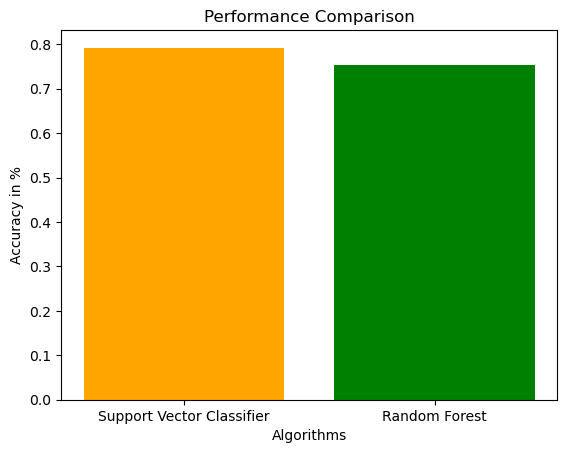

In [28]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1,2] 
  
# heights of bars 
height = [acc, acc1] 
  
# labels for bars 
tick_label = ['Support Vector Classifier', 'Random Forest'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['orange', 'green']) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy in %') 
# plot title 
plt.title('Performance Comparison') 
  
# function to show the plot 
plt.show() 

In [29]:
#predict the data

In [30]:
ip_data=(1,85,66,29,0,26.6,0.351,31)
ip_arr=np.asarray(ip_data)
print(ip_arr)

[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]


In [31]:
res_arr=ip_arr.reshape(1,-1)
res_arr

array([[ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ]])

In [32]:
pred=model.predict(res_arr)
print(pred)

[0]


In [33]:
if (pred==0):
    print("The Person is Not Diabetic")
else:
    print("The Person is Diabetic")

The Person is Not Diabetic


Saving the Trained Model

In [34]:
import pickle

In [35]:
filename='train_model.sav'
pickle.dump(model,open(filename,'wb'))

Loading the Saved  Model

In [36]:
loaded_model=pickle.load(open('train_model.sav','rb'))

In [37]:
ip_data=(1,85,66,29,0,26.6,0.351,31)
ip_arr=np.asarray(ip_data)
res_arr=ip_arr.reshape(1,-1)
pred=loaded_model.predict(res_arr)
if (pred==0):
    print("The Person is Not Diabetic")
else:
    print("The Person is Diabetic")


The Person is Not Diabetic
